In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 
plt.style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Dataset 

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

# A peak of each csv

# aisles

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisles.shape

(134, 2)

In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


# departments

In [6]:
departments.shape

(21, 2)

# order_products_prior

In [7]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_prior.shape


(32434489, 4)

In [9]:
len(order_products_prior.order_id.unique())

3214874

# order_products_train

In [10]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
order_products_train.shape


(1384617, 4)

In [12]:
len(order_products_train.order_id.unique())


131209

# orders

In [13]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [14]:
orders.shape


(3421083, 7)

# products

In [15]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
products.shape


(49688, 4)

# Explore more on orders


In [17]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
print(orders.shape)
print('there are', len(orders[orders.eval_set == 'prior']), 'entries for prior')
print('there are', len(orders[orders.eval_set == 'train']), 'entries for train')
print('there are', len(orders[orders.eval_set == 'test']), 'entries for test')

(3421083, 7)
there are 3214874 entries for prior
there are 131209 entries for train
there are 75000 entries for test


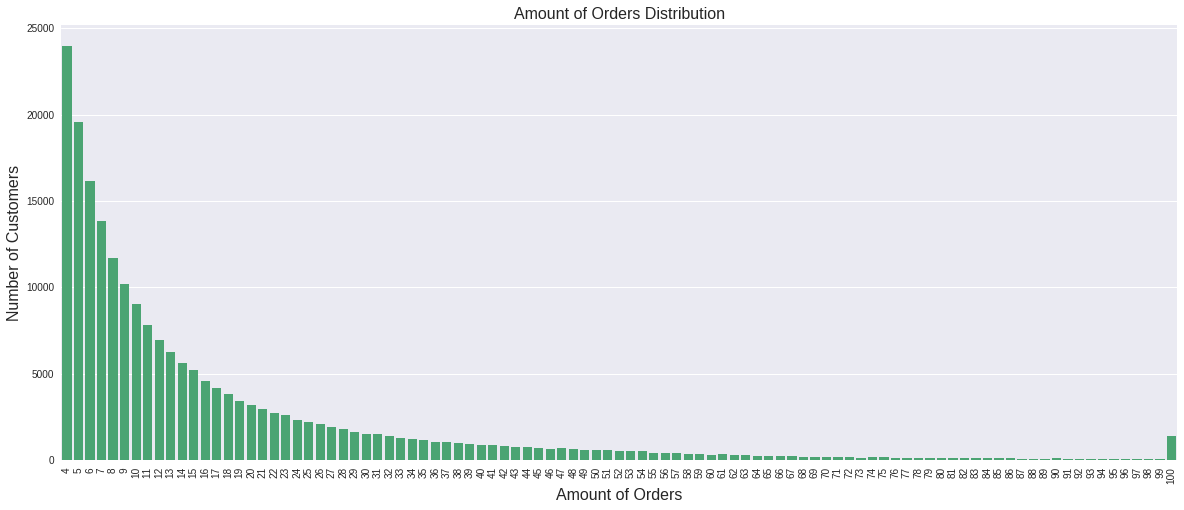

In [19]:
orders_amount_for_customer = orders.groupby('user_id')['order_number'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=orders_amount_for_customer.index, y=orders_amount_for_customer.values, color='mediumseagreen')
plt.title('Amount of Orders Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Amount of Orders', fontsize=16)
plt.xticks(rotation='vertical');

In [20]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
days = orders.order_dow.values.tolist()
def get_day():
    res = []
    for day in days:
        if day == 0:
            res.append('Sunday')
        elif day == 1:
            res.append('Monday')
        elif day == 2:
            res.append('Tuesday')
        elif day == 3:
            res.append('Wednesday')
        elif day == 4:
            res.append("Thursday")
        elif day == 5:
            res.append('Friday')
        elif day == 6:
            res.append('Saturday')
    return res

In [24]:
z = orders.copy()


In [25]:
z['order_dayofweek'] = get_day()


In [26]:
z.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dayofweek
0,2539329,1,prior,1,2,8,NaN,Tuesday
1,2398795,1,prior,2,3,7,15.0,Wednesday
2,473747,1,prior,3,3,12,21.0,Wednesday
3,2254736,1,prior,4,4,7,29.0,Thursday
4,431534,1,prior,5,4,15,28.0,Thursday


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text yticklabel objects>)

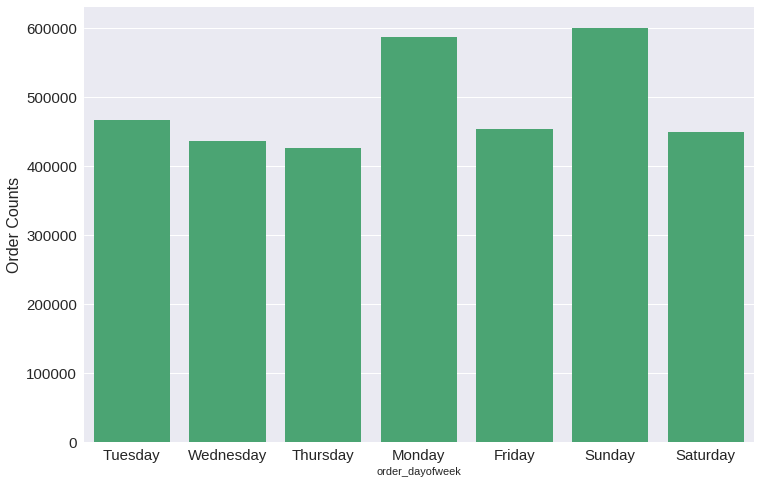

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x=z.order_dayofweek, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
#plt.xlabel('Day of Week', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text yticklabel objects>)

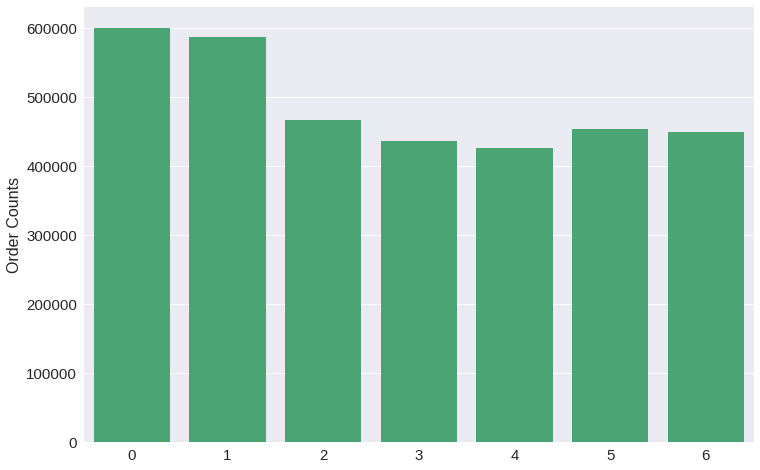

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_dow, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)


In [77]:
#0 and 1 has the most orders in a week, while 4 has the least
#not sure which day of week is corresponding to a number, maybe 0 is Sun and 6 is Sat?

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text yticklabel objects>)

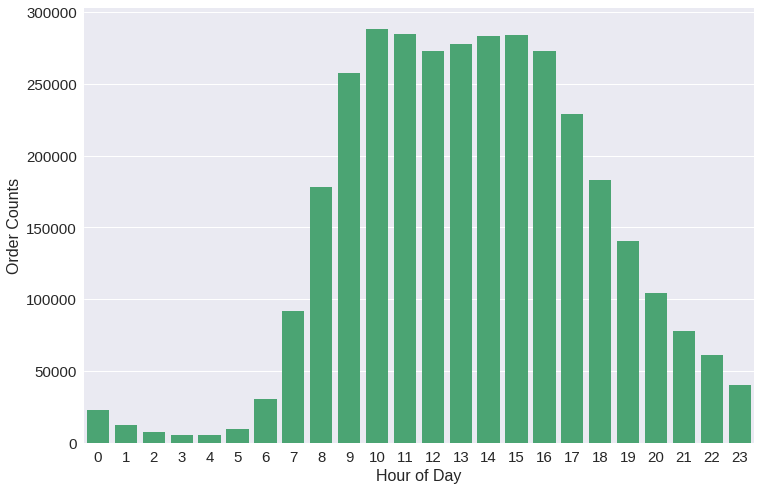

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_hour_of_day, color='mediumseagreen')

#plt.title("Order Amounts by Hours", fontsize=16)
plt.xlabel('Hour of Day', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)


In [78]:
#Looks like people like to order between 8am to 6pm, couldn't find the what the number corresponding to in data dictionary

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]), <a list of 9 Text yticklabel objects>)

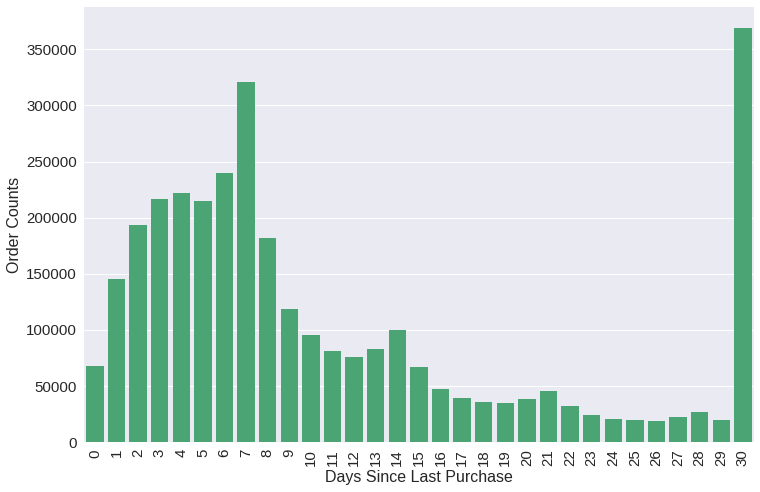

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.days_since_prior_order, color= 'mediumseagreen')

#plt.title("Number of Orders per Days Since Last Purchase", fontsize=16)
plt.xlabel('Days Since Last Purchase', fontsize=16)
plt.xticks(np.arange(31), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                          24, 25, 26, 27, 28, 29, 30],  fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)

In [79]:
#looks like majority people order once a week, between 0 to 7.
#and there are people who order once more than 30 days.

# Explore more on order_product_prior & order_product_train


In [31]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [33]:
print(order_products_prior.shape)
print(order_products_train.shape)

(32434489, 4)
(1384617, 4)


In [34]:
order_products_total = pd.concat([order_products_prior, order_products_train])

print(order_products_total.shape)

(33819106, 4)


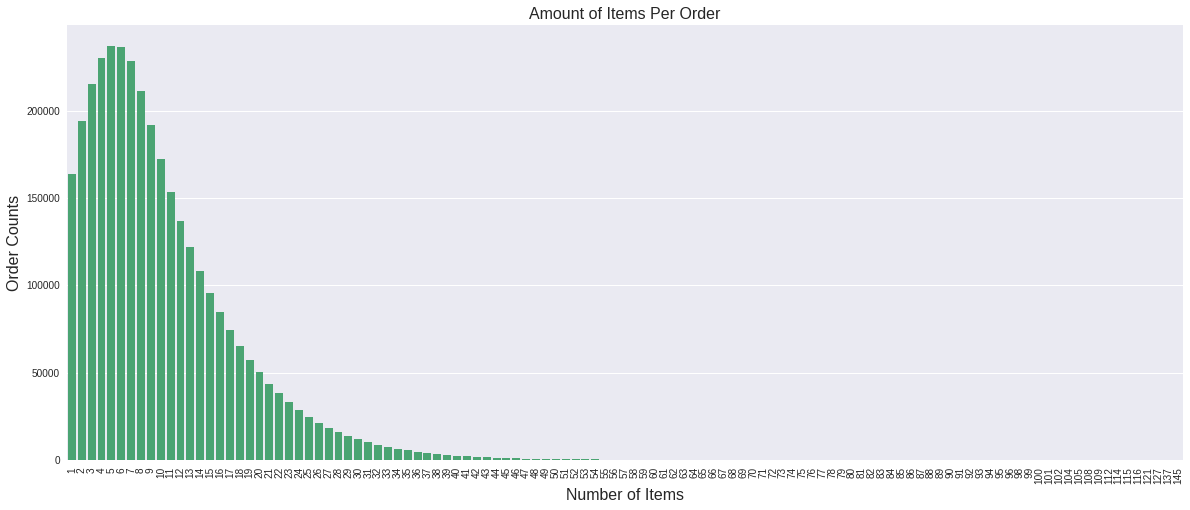

In [35]:
frequency_per_number_of_order = order_products_total.groupby('order_id')['product_id'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=frequency_per_number_of_order.index, y=frequency_per_number_of_order.values, color='mediumseagreen')
plt.title('Amount of Items Per Order', fontsize=16)
plt.ylabel('Order Counts', fontsize=16)
plt.xlabel('Number of Items', fontsize=16)
plt.xticks(rotation='vertical');


In [80]:
#looks like people msotly purchase 4 items per order
#looks like majority people like to purchase between 3 to 8 items per order

In [36]:
print('there are', order_products_total.shape[0], 'grocery products ordered')
print('there are', len(order_products_total.order_id.unique()), 'order transactions')
print('there are', len(order_products_total.product_id.unique()), 'unique products')

there are 33819106 grocery products ordered
there are 3346083 order transactions
there are 49685 unique products


In [37]:
print(len(order_products_total[order_products_total.reordered == 1])/order_products_total.shape[0], 'have reordered before')
print(len(order_products_total[order_products_total.reordered == 0])/order_products_total.shape[0], 'haven\'t reordered before')

0.5900617242809434 have reordered before
0.40993827571905656 haven't reordered before


In [38]:
print(len(order_products_total[order_products_total.reordered == 1]), 'products have reordered before')
print(len(order_products_total[order_products_total.reordered == 0]), 'products haven\'t reordered before')

19955360 products have reordered before
13863746 products haven't reordered before


# Explore more on aisles, departments & products¶


In [41]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [42]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [43]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [44]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
print(aisles.shape)
print(departments.shape)
print(products.shape)

(134, 2)
(21, 2)
(49688, 4)


In [46]:
products_departments = products.merge(departments, left_on='department_id', right_on='department_id', how='left')
products_departments_aisles = products_departments.merge(aisles, left_on='aisle_id', right_on='aisle_id', how='left')
products_departments_aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [47]:
products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head(10)

,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007
7,dairy eggs,3449
11,household,3085
6,canned goods,2092
9,dry goods pasta,1858
19,produce,1684


# Explore more on products_departments_aisles & order_products_total

In [49]:
order_products_total.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [50]:
products_departments_aisles.head()


,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [51]:
df = order_products_total.merge(products_departments_aisles, left_on='product_id', right_on='product_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [52]:
df.shape


(33819106, 9)

In [53]:
top_15_products = df.product_name.value_counts(ascending=False).reset_index().head(15)
top_15_products.columns = ['product_name', 'count']
top_15_products

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


In [54]:
top_15_aisles = df.aisle.value_counts(ascending=False).reset_index().head(15)
top_15_aisles.columns = ['aisle_name', 'count']
top_15_aisles

,aisle_name,count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


In [55]:
top_15_department = df.department.value_counts(ascending=False).reset_index().head(15)
top_15_department.columns = ['department_name', 'count']
top_15_department

,department_name,count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


In [56]:
df.groupby('department')


In [57]:
reorder_ratio_per_dep = df.groupby('department')['reordered'].mean().reset_index()
reorder_ratio_per_dep.columns = ['department', 'reorder_ratio']
reorder_ratio_per_dep.sort_values(by='reorder_ratio', ascending=False)

,department,reorder_ratio
7,dairy eggs,0.670161
3,beverages,0.653651
19,produce,0.650521
2,bakery,0.628381
8,deli,0.608130
18,pets,0.602557
1,babies,0.577680
5,bulk,0.577090
20,snacks,0.574464
0,alcohol,0.571221


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 9 Text yticklabel objects>)

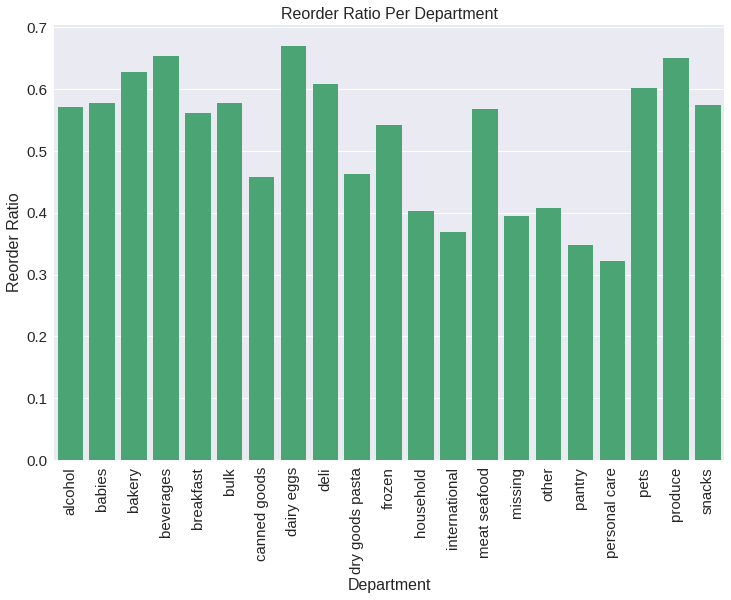

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=reorder_ratio_per_dep.department, y=reorder_ratio_per_dep.reorder_ratio, color='mediumseagreen')
plt.title('Reorder Ratio Per Department', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15)

In [59]:
df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [60]:
reorder_ratio_per_aisle = df.groupby('aisle')['reordered'].mean().reset_index()
reorder_ratio_per_aisle.columns = ['aisle', 'reorder_ratio']
reorder_ratio_per_aisle.sort_values(by='reorder_ratio', ascending=False)

,aisle,reorder_ratio
83,milk,0.781812
131,water seltzer sparkling water,0.729930
50,fresh fruits,0.718823
41,eggs,0.706359
119,soy lactosefree,0.692361
96,packaged produce,0.691977
133,yogurt,0.686501
33,cream,0.685184
11,bread,0.670552
110,refrigerated,0.663006


In [61]:
#milk aisle has the highest reorder ratio
#spices seasonings has the least reorder ratio

In [62]:
top_15_reorder_items = df.groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered', ascending=False).head(15)
top_15_reorder_items

,product_name,reordered
3677,Banana,415166
3472,Bag of Organic Bananas,329275
31923,Organic Strawberries,214448
28843,Organic Baby Spinach,194939
30300,Organic Hass Avocado,176173
28807,Organic Avocado,140270
32481,Organic Whole Milk,118684
22415,Large Lemon,112178
31366,Organic Raspberries,109688
42908,Strawberries,104588


In [63]:
df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [64]:
add_to_cart_order_reordered_ratio = df.groupby('add_to_cart_order')['reordered'].mean().reset_index()
add_to_cart_order_reordered_ratio.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


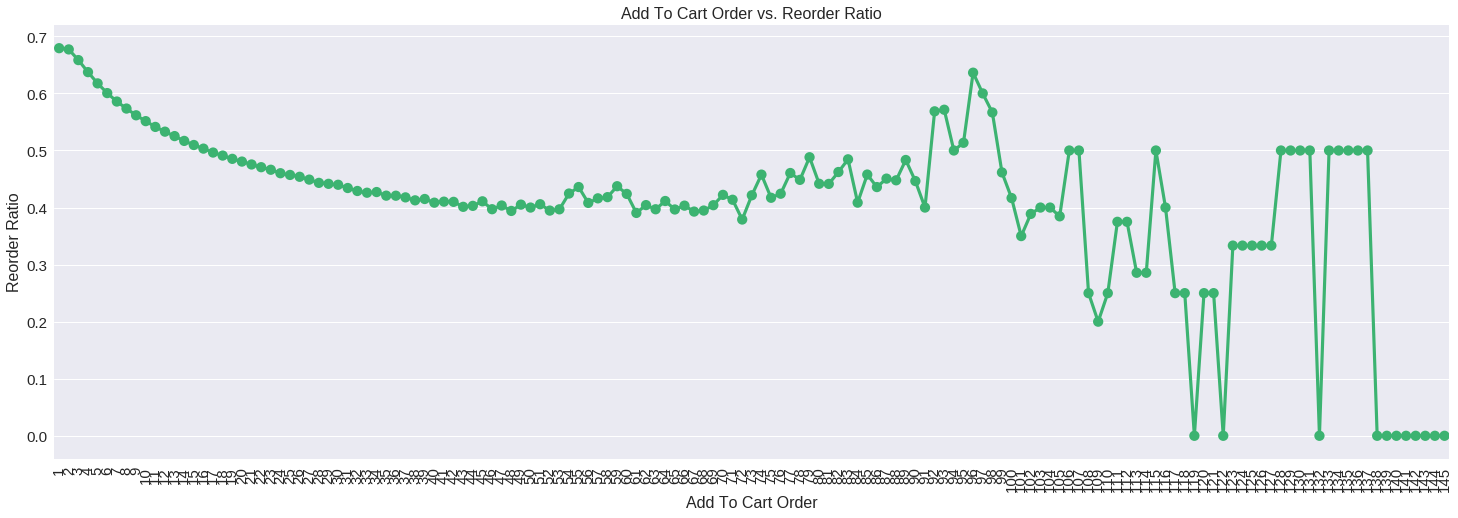

In [65]:
plt.figure(figsize=(25,8))
sns.pointplot(add_to_cart_order_reordered_ratio.add_to_cart_order, add_to_cart_order_reordered_ratio.reordered, color='mediumseagreen')
plt.title('Add To Cart Order vs. Reorder Ratio', fontsize=16)
plt.xlabel('Add To Cart Order', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15);

# looking what items are ordered before noon, and what items are ordered after noon

In [66]:
# remove any rows referring to the test set
df_orders = orders[orders.eval_set != 'test']

# drop the eval_set column
df_orders = df_orders.drop(['eval_set'], axis=1)

# concatenate the _prior and _train datasets
df_order_products = pd.concat([order_products_prior, order_products_train])

# expand every order_id with the list of product_ids in that order_id
temp = df_orders.merge(df_order_products, on='order_id')
temp.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1,0
1,2539329,1,1,2,8,NaN,14084,2,0
2,2539329,1,1,2,8,NaN,12427,3,0
3,2539329,1,1,2,8,NaN,26088,4,0
4,2539329,1,1,2,8,NaN,26405,5,0


In [67]:
## Keep only the top 2000 products
top_products = pd.DataFrame({'total_count': temp.groupby('product_id').size()}).sort_values('total_count', ascending=False).reset_index()[:2000]
top_products = top_products.merge(products, on='product_id')
top_products.head()

,product_id,total_count,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4


In [68]:
# keep only observations that have products in top_products
temp = temp.loc[temp['product_id'].isin(top_products.product_id)]

In [69]:
product_orders_by_hour = pd.DataFrame({'count': temp.groupby(['product_id', 'order_hour_of_day']).size()}).reset_index()
product_orders_by_hour['pct'] = product_orders_by_hour.groupby('product_id')['count'].apply(lambda x: x/x.sum()*100)
product_orders_by_hour.head(24)

,product_id,order_hour_of_day,count,pct
0,34,0,23,0.339283
1,34,1,18,0.265526
2,34,2,11,0.162266
3,34,3,5,0.073757
4,34,4,5,0.073757
5,34,5,15,0.221272
6,34,6,57,0.840832
7,34,7,202,2.979791
8,34,8,402,5.930078
9,34,9,509,7.508482


In [70]:
mean_hour = pd.DataFrame({'mean_hour': product_orders_by_hour.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['count'])/sum(x['count']))}).reset_index()
mean_hour.head()

,product_id,mean_hour
0,34,13.511285
1,45,13.398624
2,79,13.502530
3,116,12.516822
4,117,13.392173


In [71]:
morning = mean_hour.sort_values('mean_hour')[:25]
morning = morning.merge(products, on='product_id')
morning.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,9292,11.767279,Half And Half Ultra Pasteurized,84,16
1,46562,11.898340,Sweet & Salty Nut Granola Bars Peanut,3,19
2,45051,12.004019,Pub Mix,107,19
3,36472,12.049459,Nutri Grain Bars Multi Pack,48,14
4,37710,12.059043,Trail Mix,125,19


In [72]:
afternoon = mean_hour.sort_values('mean_hour', ascending=False)[:25]
afternoon = afternoon.merge(products, on='product_id')
afternoon.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,30668,14.526986,Half Baked Frozen Yogurt,37,1
1,45541,14.526299,The Tonight Dough™ Ice Cream,37,1
2,45681,14.394912,Americone Dream® Ice Cream,37,1
3,46175,14.388942,Half Baked® Ice Cream,37,1
4,14335,14.373308,Phish Food® Ice Cream,37,1


In [73]:
morning_pct = product_orders_by_hour.merge(morning, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'])
afternoon_pct = product_orders_by_hour.merge(afternoon, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'], ascending=False)

In [74]:
# get list of morning and afteroon product names
morning_product_names = list(morning_pct['product_name'].unique())
morning_product_names = '\n'.join(morning_product_names)
afternoon_product_names = list(afternoon_pct['product_name'].unique())
afternoon_product_names = '\n'.join(afternoon_product_names)

# hack to remove 'Variety Pack' from Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage
morning_product_names = morning_product_names.replace('Variety Pack ', '')

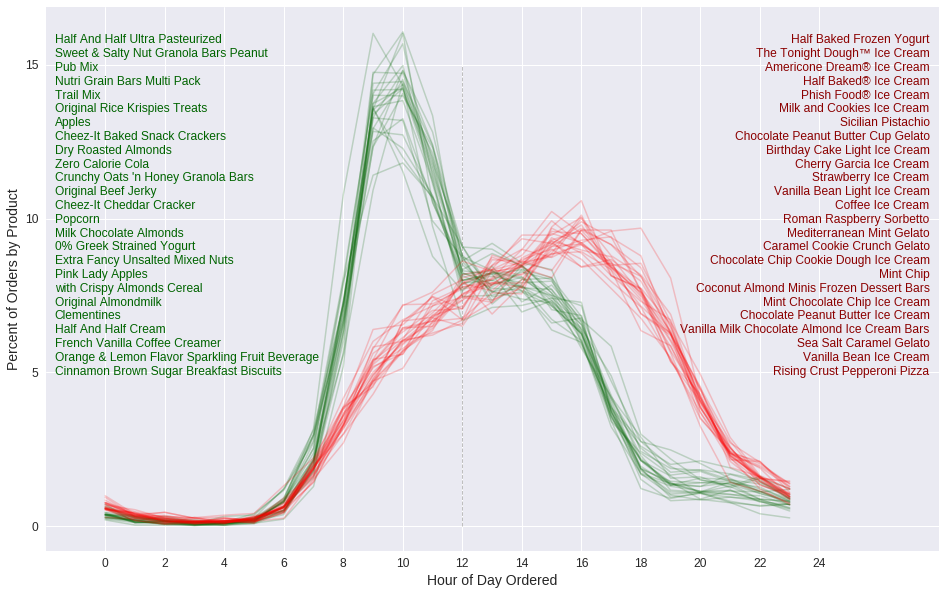

In [75]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 10))

# Plot
morning_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                       y='pct', 
                                       ax=ax, 
                                       legend=False,
                                       alpha=0.2,
                                       aa=True,
                                       color='darkgreen',
                                       linewidth=1.5,)
afternoon_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='red',
                                         linewidth=1.5,)

# Aesthetics
# Margins
plt.margins(x=0.5, y=0.05)

# Hide spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Labels
label_font_size = 14
plt.xlabel('Hour of Day Ordered', fontsize=label_font_size)
plt.ylabel('Percent of Orders by Product', fontsize=label_font_size)

# Tick Range
tick_font_size = 12
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-2, 28])

# Vertical line at noon
plt.vlines(x=12, ymin=0, ymax=15, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0)

# Text
text_font_size = 12
ax.text(0.01, 0.95, morning_product_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='darkgreen', fontsize=text_font_size)
ax.text(0.99, 0.95, afternoon_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=text_font_size);